<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Sofia">
<style>
  @import url('https://fonts.googleapis.com/css2?family=Concert+One&display=swap');
  .topic {
    text-align: center;
    font-weight: 900;
    font-size: 50px;
    text-shadow: 3px 3px 3px #ababab;
    font-family: 'Concert One', sans-serif;
  }
  @import url('https://fonts.googleapis.com/css2?family=Lobster&display=swap');
  .info {
    text-align: center;
    font-weight: 800;
    font-size: 40px;
    font-family: 'Lobster', sans-serif;
  }
</style>

<h1 class=topic>Google Analytics Customer Revenue Prediction</h1>
<h2 class=info>Vũ Minh Phát - 21127739</h2>

___

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring your data

**Read cleaned data from file**

In [2]:
cleaned_df = pd.read_csv("../data/processed/train_preprocessed.csv")

In [3]:
cleaned_df.head()

,channelGrouping,date,visitNumber,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,...,totals.newVisits,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,date.day,date.year,date.month,date.weekDay,date.weekOfYear
0,Organic Search,2016-09-02,1,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,...,True,0.0,google,organic,False,2,2016,9,4,35
1,Organic Search,2016-09-02,1,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,...,True,0.0,google,organic,False,2,2016,9,4,35
2,Organic Search,2016-09-02,1,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,...,True,0.0,google,organic,False,2,2016,9,4,35
3,Organic Search,2016-09-02,1,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,...,True,0.0,google,organic,False,2,2016,9,4,35
4,Organic Search,2016-09-02,2,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,...,False,0.0,google,organic,True,2,2016,9,4,35


In [4]:
cleaned_df.columns

Index(['channelGrouping', 'date', 'visitNumber', 'device.browser',
       'device.operatingSystem', 'device.isMobile', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.city', 'totals.hits',
       'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.isTrueDirect', 'date.day',
       'date.year', 'date.month', 'date.weekDay', 'date.weekOfYear'],
      dtype='object')

## Đặt câu hỏi

**Câu hỏi 1**: Tỉ lệ của tỉ lệ chi tiêu như thế nào so với tỉ lệ của từng thuộc tình.

Trả lời câu hỏi trên sẽ giúp ta đánh giá được các danh mục có sự thành công lớn trong việc quảng cáo đồng thời xem xét áp dụng phương pháp này đến các danh mục khác

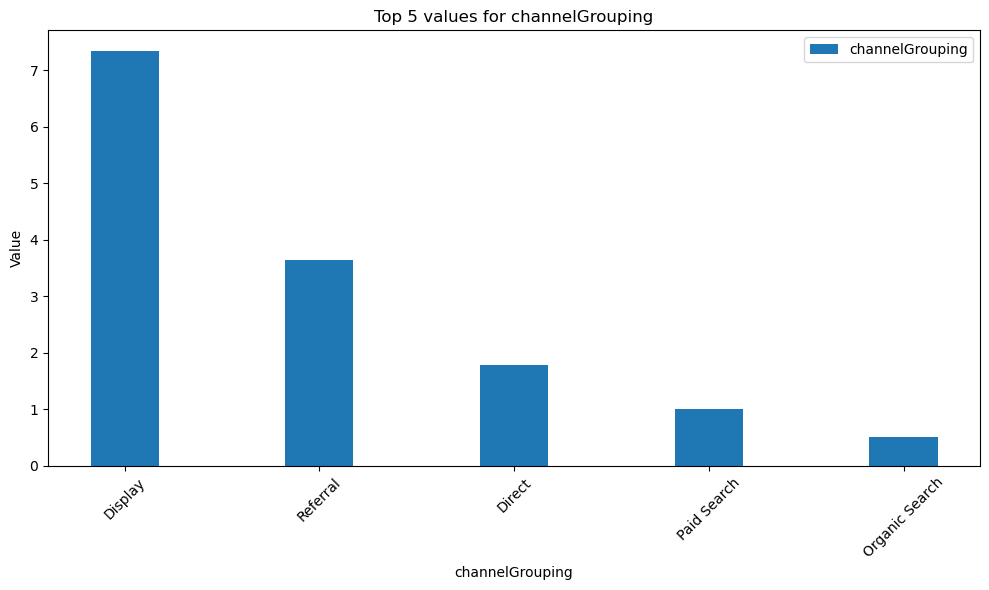

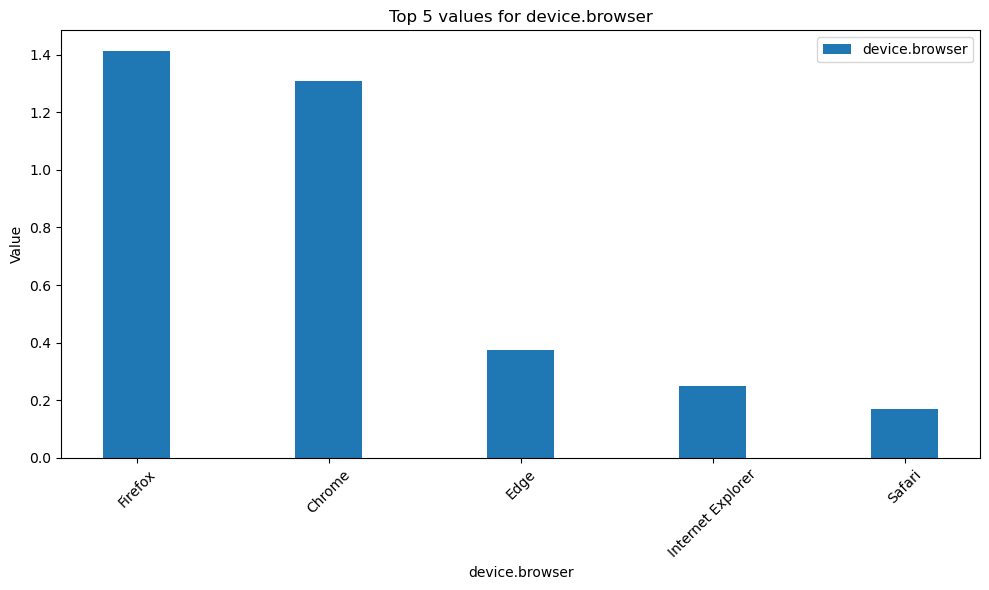

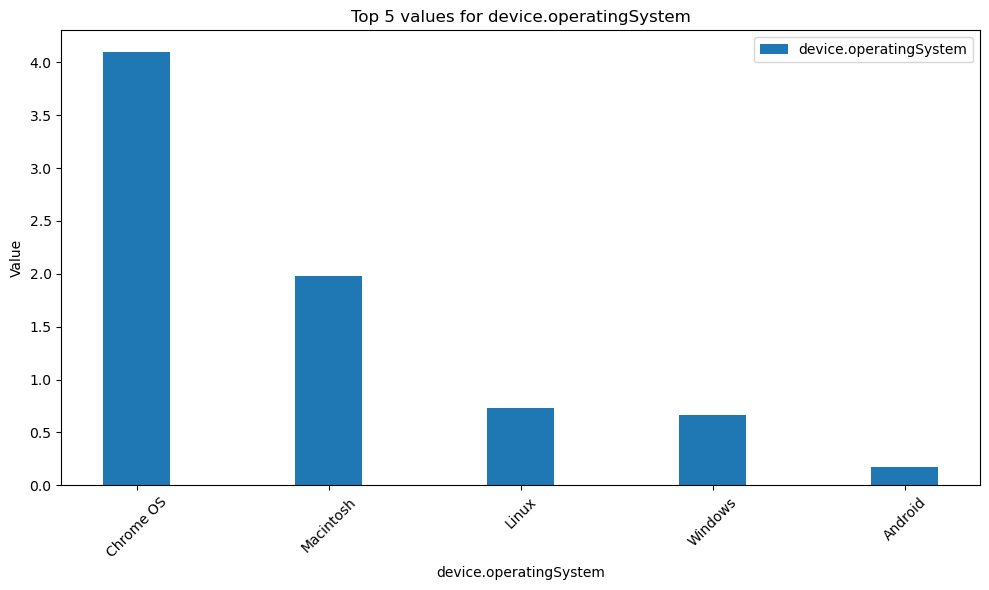

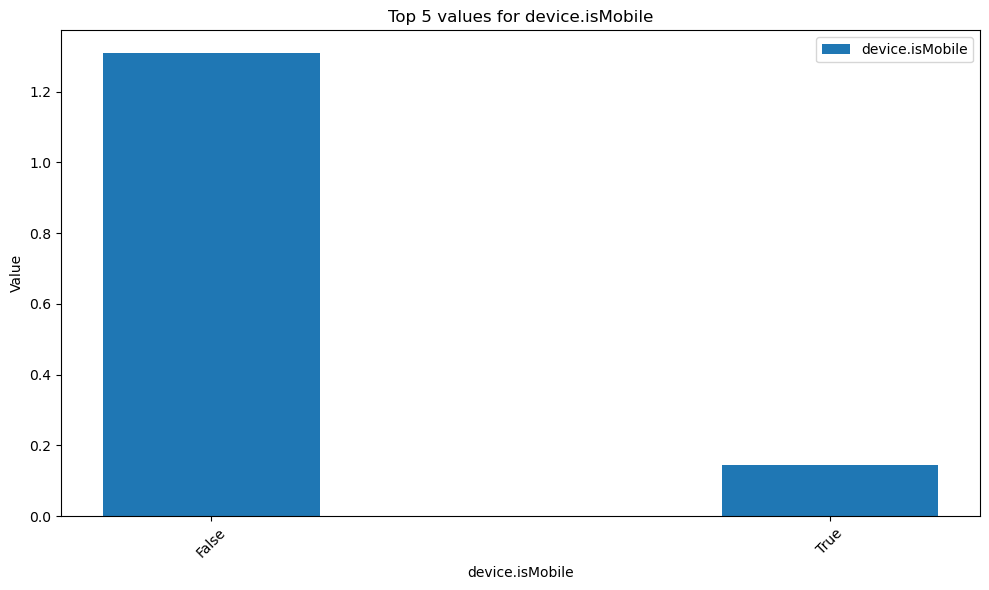

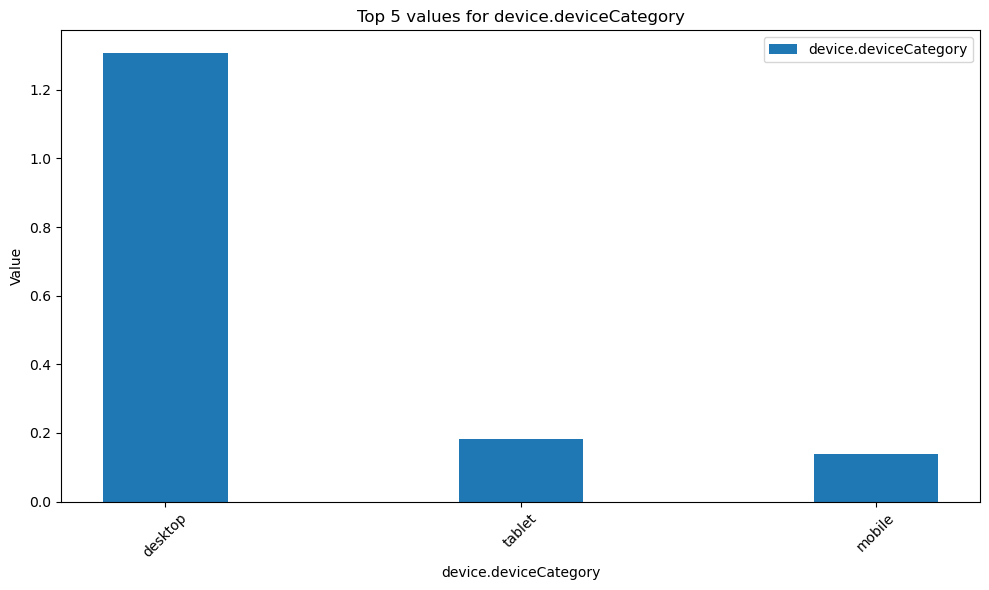

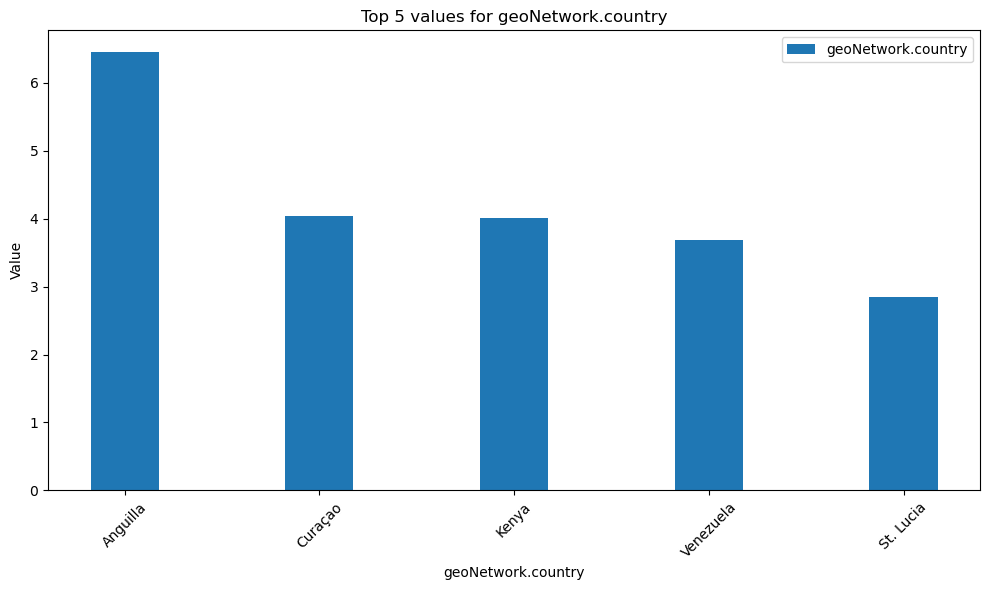

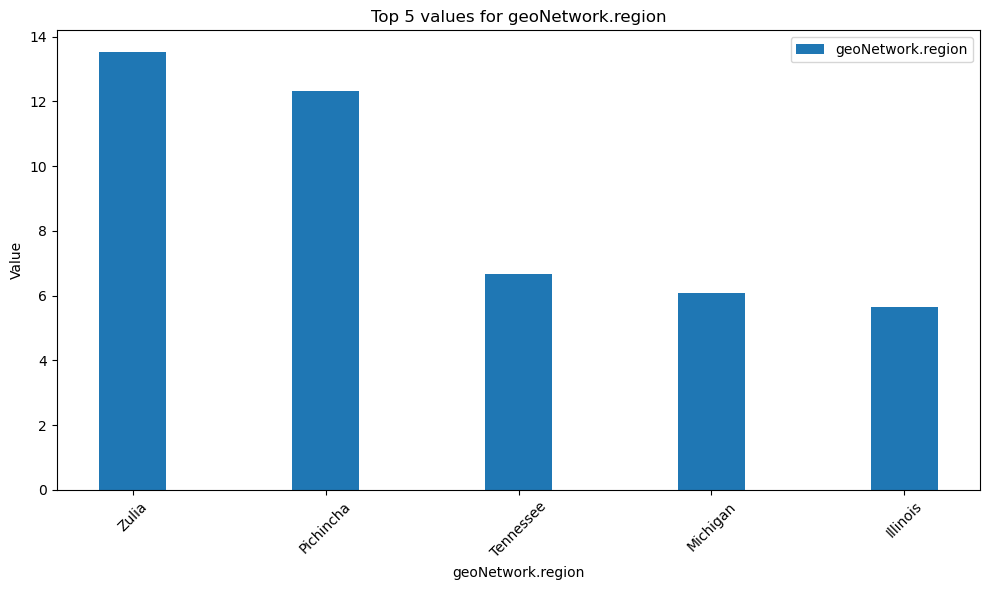

In [5]:
labels = ['channelGrouping', 'device.browser', 'device.operatingSystem', 'device.isMobile', 'device.deviceCategory', 'geoNetwork.country', 'geoNetwork.region']
date = ['date.weekDay', 'date.weekOfYear']

for label in labels:
    l = cleaned_df[label].copy()
    unis = l.unique()
    data = cleaned_df['totals.transactionRevenue'].copy()
    
    bar_width = 0.35
    
    values = []
    for uni in unis:
        s1 = sum(l == uni) / len(l)
        s2 = sum(data[l == uni]) / sum(data)
        value = s2 / s1
        values.append((uni, value))
    
    # Sắp xếp theo giá trị giảm dần và chọn 5 giá trị cao nhất
    sorted_values = sorted(values, key=lambda x: x[1], reverse=True)[:5]
    top_unis = [val[0] for val in sorted_values]
    top_values = [val[1] for val in sorted_values]
    
    index = range(len(top_unis))
    
    plt.figure(figsize=(10, 6))
    plt.bar(index, top_values, bar_width, label=label)
    
    plt.xlabel(label)
    plt.ylabel('Value')
    plt.title('Top 5 values for {}'.format(label))
    plt.xticks(index, top_unis, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

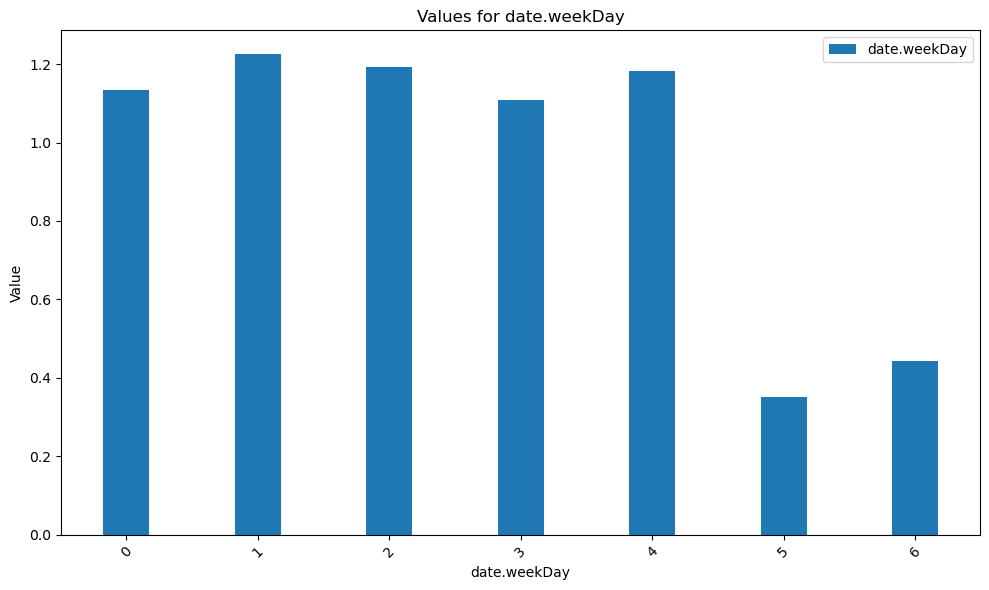

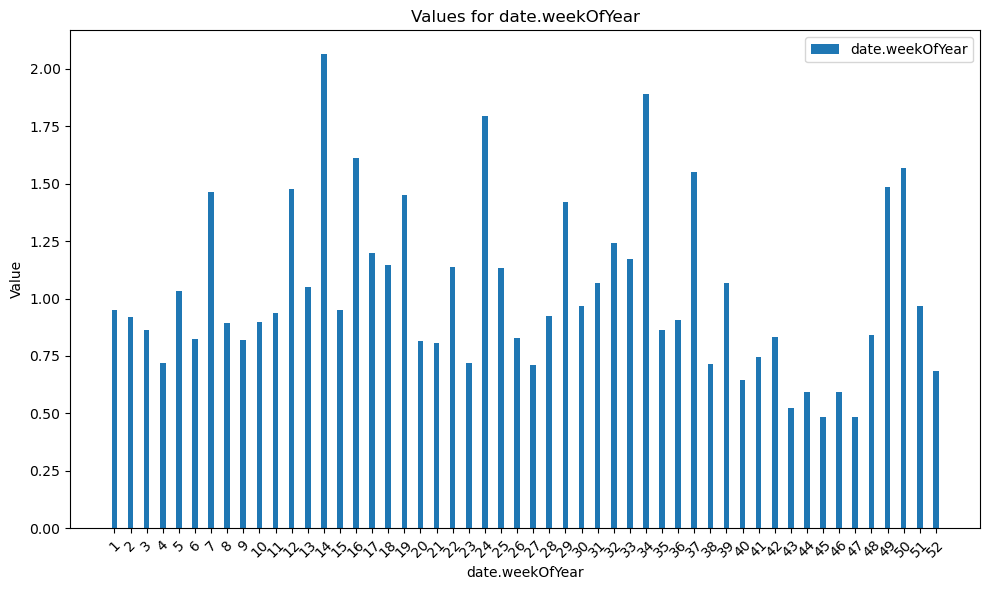

In [6]:
for d in date:
    l = cleaned_df[d].copy()
    unis = l.unique()
    unis = sorted(unis)
    data = cleaned_df['totals.transactionRevenue'].copy()
    
    bar_width = 0.35
    
    values = []
    for uni in unis:
        s1 = sum(l == uni) / len(l)
        s2 = sum(data[l == uni]) / sum(data)
        value = s2 / s1
        values.append((uni, value))
    

    top_unis = [val[0] for val in values]
    top_values = [val[1] for val in values]
    
    index = range(len(top_unis))
    
    plt.figure(figsize=(10, 6))
    plt.bar(index, top_values, bar_width, label=d)
    
    plt.xlabel(d)
    plt.ylabel('Value')
    plt.title('Values for {}'.format(d))
    plt.xticks(index, top_unis, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

**Câu hỏi 2**: Có mối quan hệ nào giữa số tiền chi tiêu so với các giá trị khác trong phiên giao dịch hay không?

Trả lời câu hỏi trên sẽ giúp chúng ta đánh giá được sự ảnh yếu tố trong phiên giao dịch trước khi khách hàng đưa ra quyết định thanh toán cuối cùng, qua đó có được quyết định tiếp thị tốt hơn trong phiên giao dịch.

In [7]:
total = cleaned_df[['totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue']].copy()
corr_matrix = total.corr()
corr_matrix['totals.transactionRevenue'].sort_values(ascending=False)

totals.transactionRevenue    1.000000
totals.pageviews             0.155590
totals.hits                  0.154333
totals.bounces              -0.032206
totals.newVisits            -0.041164
Name: totals.transactionRevenue, dtype: float64

**Câu 3**: Tỉ lệ giữa số tiền chi tiêu so với số lần chi tiêu là bao nhiêu.

Trả lời câu hỏi sẽ giúp chúng ta đánh giá được tình hình mua hàng, liêu người mua sẽ chi một số lượng tiền lớn cho một lần mua hay sẽ mua theo nhiều lần với số tiền thấp.

In [8]:
data = cleaned_df['totals.transactionRevenue'].copy()
times_ratio = sum(data > 0) / len(data)
spend_ratio = data[data > 0].median() / sum(data)
print(f'>> Tỉ lệ số lần thanh toán là : {times_ratio * 100: .3f}%')
print(f'>> Tỉ lệ số tiền chi tiêu là: {spend_ratio * 100: .3f}%')
print(f'>> Tỉ lệ số lần thanh toán so với số tiền chi là: {times_ratio/spend_ratio: .3f}')

>> Tỉ lệ số lần thanh toán là :  1.274%
>> Tỉ lệ số tiền chi tiêu là:  0.003%
>> Tỉ lệ số lần thanh toán so với số tiền chi là:  396.859


<Axes: ylabel='Frequency'>

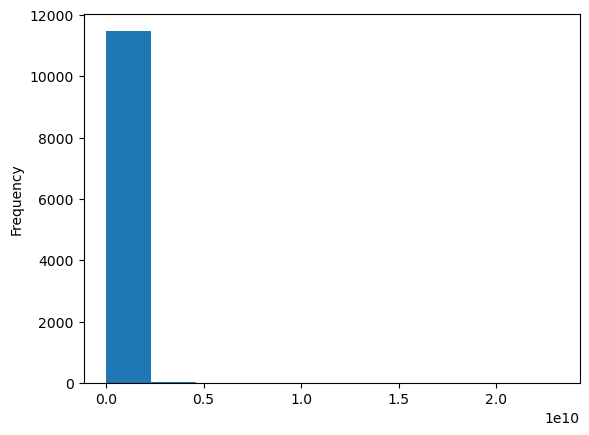

In [9]:
data[data > 0].plot.hist()

<Axes: ylabel='Frequency'>

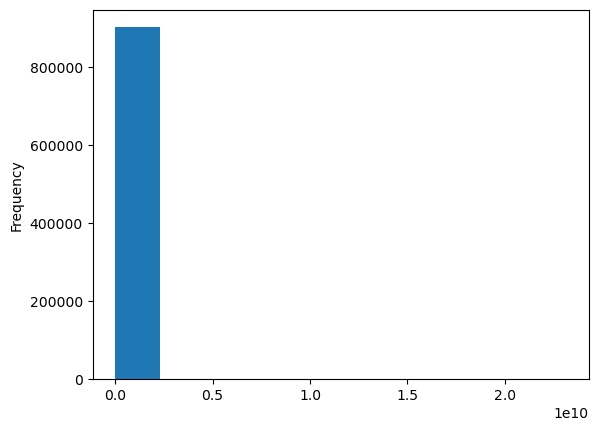

In [10]:
data.plot.hist()